In [268]:
import os

In [6]:
base_path = "C:/Users/user/Downloads/train_images"
for count, file in enumerate(sorted(os.listdir(base_path))):
    os.rename(f"{base_path}/{file}", f"{base_path}/{count}.jpg")

# Parse scaning images

In [309]:
data_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination"
orig_folder = "camera"
scan_folder = "scan"

In [44]:
all_camera_files = os.listdir(f"{data_base_path}/{orig_folder}")
all_scan_files = os.listdir(f"{data_base_path}/{scan_folder}")

In [45]:
all_camera_names = [file.split('.')[0] for file in all_camera_files]
all_scan_names = [file.split('.')[0] for file in all_scan_files]

In [46]:
print(len(all_camera_names))
print(len(all_scan_names))

987
634


In [47]:
no_cam_names = []
for file in os.listdir(f"{data_base_path}/{scan_folder}"):
    name = file.split('.')[0].split('_')[0]
    if name not in all_camera_names:
        no_cam_names.append(name)
        

no_scan_names = []
for file in os.listdir(f"{data_base_path}/{orig_folder}"):
    name = file.split('.')[0].split('_')[0]
    if name not in all_scan_names:
        #if name not in no_scan_names:
        no_scan_names.append(name)

In [48]:
print(len(no_cam_names))
print(len(no_scan_names))

103
73


In [49]:
no_cam_names

['강복은',
 '강순임',
 '강옥회',
 '강윤남',
 '강평임',
 '강평임',
 '고재원',
 '고재원',
 '곽경훈',
 '권창순',
 '길청남',
 '김경석',
 '김경화',
 '김미숙',
 '김상남',
 '김성석',
 '김연엽',
 '김옥자',
 '김우신',
 '김유속',
 '김윤자',
 '김이경',
 '김잉석',
 '김적남',
 '김정순b',
 '김종식',
 '김종식',
 '김중훈',
 '김진영',
 '김현미',
 '김형식',
 '김후자',
 '노미숙',
 '노점순',
 '노중운',
 '민병',
 '박경연',
 '박경희',
 '박동옥',
 '박말필',
 '박명순',
 '박수봉',
 '박순임',
 '박영곤',
 '박영숙',
 '박영자',
 '박인말',
 '박혜인',
 '방인숙',
 '방정자',
 '백옥임',
 '백이',
 '손분순',
 '손우정',
 '송학래',
 '신필권b',
 '신학룡',
 '안병옥',
 '양문심',
 '유기문',
 '유태순',
 '윤동웅',
 '윤승만',
 '윤승만',
 '윤혜정',
 '이경미',
 '이복회',
 '이상수',
 '이속희',
 '이순교',
 '이은육',
 '이점순',
 '이정민',
 '이한희',
 '이형관',
 '이호영',
 '임대섭',
 '임언수',
 '임춘득',
 '장란순',
 '장평임',
 '전봉선',
 '정귀달',
 '정멍희',
 '정병님',
 '정상량',
 '정정옥',
 '정태석',
 '정희자',
 '조상순',
 '조순덕',
 '조향순',
 '최길문',
 '최들자',
 '최묵형',
 '최순임',
 '추예섭',
 '탁현철',
 '특이 처방전1',
 '하추자',
 '한종대',
 '허광호',
 '황규순']

In [50]:
no_scan_names

['강윤상b',
 '강윤상b',
 '강윤수',
 '강윤순',
 '강평임a',
 '강평임b',
 '강평임b',
 '강후자',
 '고등오b',
 '고재원a',
 '고재원a',
 '권기봄',
 '김문결',
 '김성헌',
 '김성헌',
 '김옥자b',
 '김용일',
 '김용일',
 '김윤지',
 '김적남b',
 '김종년',
 '김종년',
 '김종식a',
 '김천자',
 '김천자',
 '노정순',
 '노종준',
 '박동욱',
 '박말필a',
 '박염자',
 '박염자',
 '박영성',
 '박영성',
 '박정이',
 '박정이',
 '배은순',
 '배은순',
 '백옥임a',
 '백옥임a',
 '변창우',
 '변창우',
 '신봉주a',
 '신봉주b',
 '옥계순',
 '옥계순',
 '윤부남',
 '윤성오',
 '윤승만a',
 '윤해정',
 '이경대',
 '이경대',
 '이월선',
 '이월선',
 '이점순a',
 '이점순a',
 '이정민b',
 '이정인',
 '정춘자',
 '정춘자',
 '조순덕a',
 '조순덕b',
 '조순덕b',
 '조은순',
 '조은순',
 '최길문a',
 '최길문a',
 '최운수',
 '표정순',
 '표정순',
 '황규손',
 '황규손',
 '황명자b',
 '황명자b']

In [11]:
import pandas as pd
pd.DataFrame(no_scan_names).to_csv("test.csv", encoding='euc-kr', index=False)

# Create new folder for final files

In [332]:
from PIL import Image, ImageOps
import numpy as np
import copy

final_orig_folder = "final_camera_good"
final_scan_folder = "final_scan_good"


orig_folder = "camera_good"
all_camera_files = os.listdir(f"{data_base_path}/{orig_folder}")
all_camera_names = [file.split('.')[0] for file in all_camera_files]

In [333]:
for file in os.listdir(f"{data_base_path}/{scan_folder}"):
    name = file.split('.')[0]#.split('_')[0]
    
    if name in all_camera_names:
        #no_cam_names.append(name)
        base_name = copy.deepcopy(name)
        count = 2
        while name in all_camera_names:
            orig = Image.open(f"{data_base_path}/{scan_folder}/{file}")
            orig.save(f"{data_base_path}/{final_scan_folder}/{name}.jpg")
            
            name = f"{base_name}_{count}"
            count+=1
            
        
        #break

In [334]:
scan_folder = "final_scan_good"
all_scan_files = os.listdir(f"{data_base_path}/{scan_folder}")
all_scan_names = [file.split('.')[0] for file in all_scan_files]

In [335]:
from pillow_heif import register_heif_opener

register_heif_opener()


In [336]:
for file in os.listdir(f"{data_base_path}/{orig_folder}"):
    name = file.split('.')[0].split('_')[0]
    save_name = file.split('.')[0]#.split('_')[0]
    
    if name in all_scan_names:
        orig = Image.open(f"{data_base_path}/{orig_folder}/{file}")
        orig = ImageOps.exif_transpose(orig)

        orig.save(f"{data_base_path}/{final_orig_folder}/{save_name}.jpg")

# Make masks

# Test one

In [455]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch

import numpy as np
import random
import copy
import time
from sklearn.model_selection import train_test_split

import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "3"


# from utils import CustomDataset, GANLoss, Vgg19
# from generator import AttU_Net
# from discriminator import Discriminator
import cv2
from PIL import Image, ImageOps
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [456]:
test_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_camera_good"
#orig_folder = "final_camera"

i = 8
test_img_path = sorted(os.listdir(test_images_base_path))[i]

In [460]:
num_pixels_x, num_pixels_y, num_channels = 1024//4, 768//4, 3

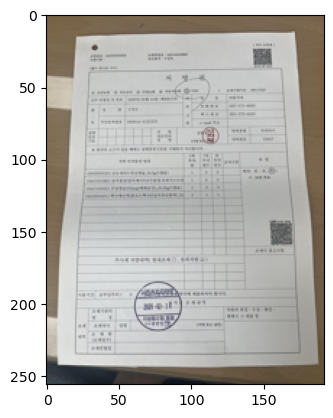

In [461]:
im = Image.open(f"{test_images_base_path}/{test_img_path}")
im = ImageOps.exif_transpose(im)
im_original = copy.deepcopy(im)
im_original = np.array(im_original)
im = im.resize((num_pixels_y, num_pixels_x))
im = np.array(im)
plt.imshow(im)

In [439]:
from models.u2net import U2NETP, U2NET

In [440]:
segment = U2NETP(out_ch=1).to(device)

In [441]:
segmentation_model_path = './weights/mask_0402_fin.pth'

segment.load_state_dict(torch.load(segmentation_model_path))

<All keys matched successfully>

In [442]:
loader = transforms.Compose([transforms.ToTensor()])

In [443]:
image = loader(im).float()
image = image.unsqueeze(0).to(device)

In [444]:
with torch.no_grad():
    mask = segment(image)
    
mask_det = torch.permute(mask[0].detach().cpu(), (0, 2,3, 1)).numpy()
mask_det = mask_det>0.8

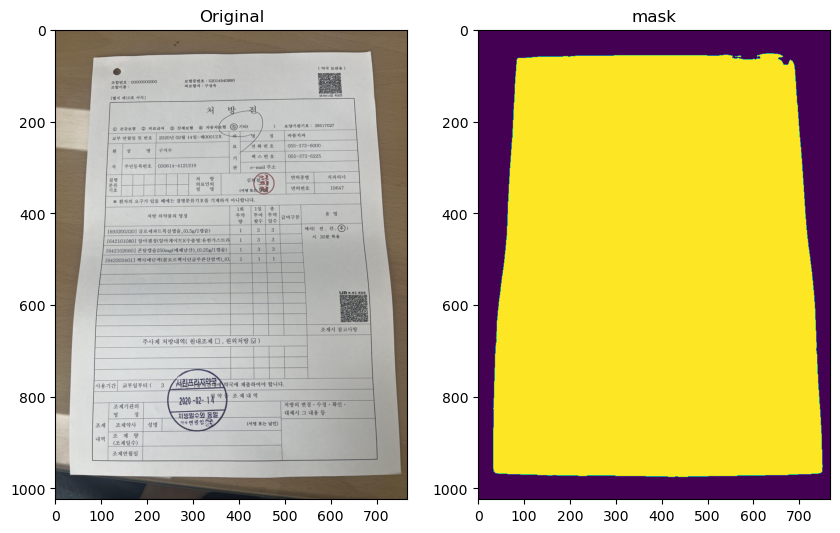

In [445]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -6
#cur_scan = scan_images[i]


axarr[0].imshow(im)
axarr[0].title.set_text('Original')

axarr[1].imshow(mask_det[0])
axarr[1].title.set_text('mask')

# axarr[2].imshow(cur_scan)
# axarr[2].title.set_text('scanned')

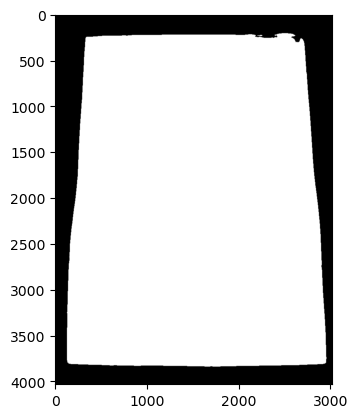

In [449]:
mask_to_find = mask_det[0]
mask_to_find = np.array(mask_to_find*255).astype(np.uint8)
mask_to_find = Image.fromarray(mask_to_find[:,:,0])

x,y,_ = im_original.shape
mask_to_find = mask_to_find.resize((y, x))
mask_to_find = np.array(mask_to_find)
plt.imshow(mask_to_find, cmap='gray')

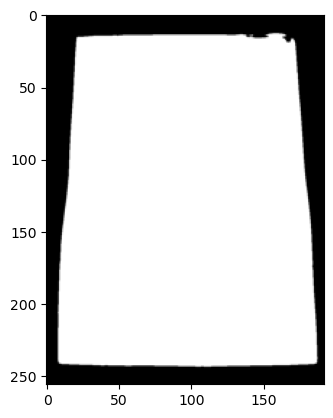

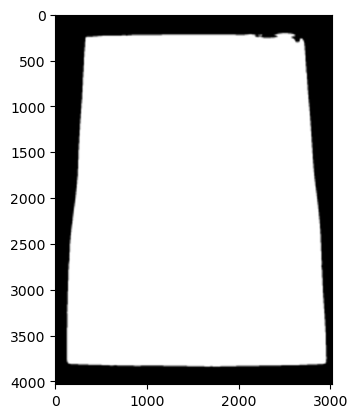

In [454]:
mask_to_find = mask_det[0]
mask_to_find = np.array(mask_to_find*255).astype(np.uint8)
mask_to_find = Image.fromarray(mask_to_find[:,:,0])

mask_to_find = mask_to_find.resize((192, 256))

x,y,_ = im_original.shape
mask_to_find_again = copy.deepcopy(mask_to_find.resize((y, x)))

mask_to_find = np.array(mask_to_find)
plt.imshow(mask_to_find, cmap='gray')
plt.show()

plt.imshow(mask_to_find_again, cmap='gray')
plt.show()

In [ ]:
#num_pixels_y, num_pixels_x = 192, 256


In [ ]:
mask_to_find = mask_to_find.resize((y, x))

In [447]:

contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

simplified_contours = []

for cnt in contours:
    hull = cv2.convexHull(cnt)
    simplified_contours.append(cv2.approxPolyDP(hull,
                                                0.001 * cv2.arcLength(hull, True), True))
biggest_n, approx_contour = biggest_contour(simplified_contours, 12192768)

warped = four_point_transform(im_original, approx_contour)

[[[2694  270]]

 [[2950 3801]]

 [[ 132 3801]]

 [[ 333  250]]]
---------
[[ 333.  250.]
 [2694.  270.]
 [2950. 3801.]
 [ 132. 3801.]]


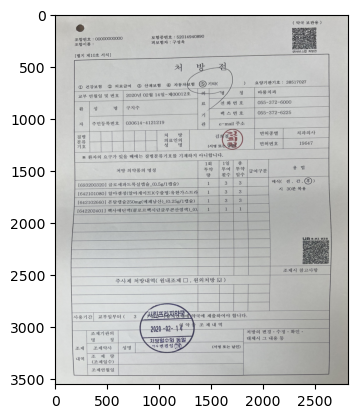

In [462]:
plt.imshow(warped)

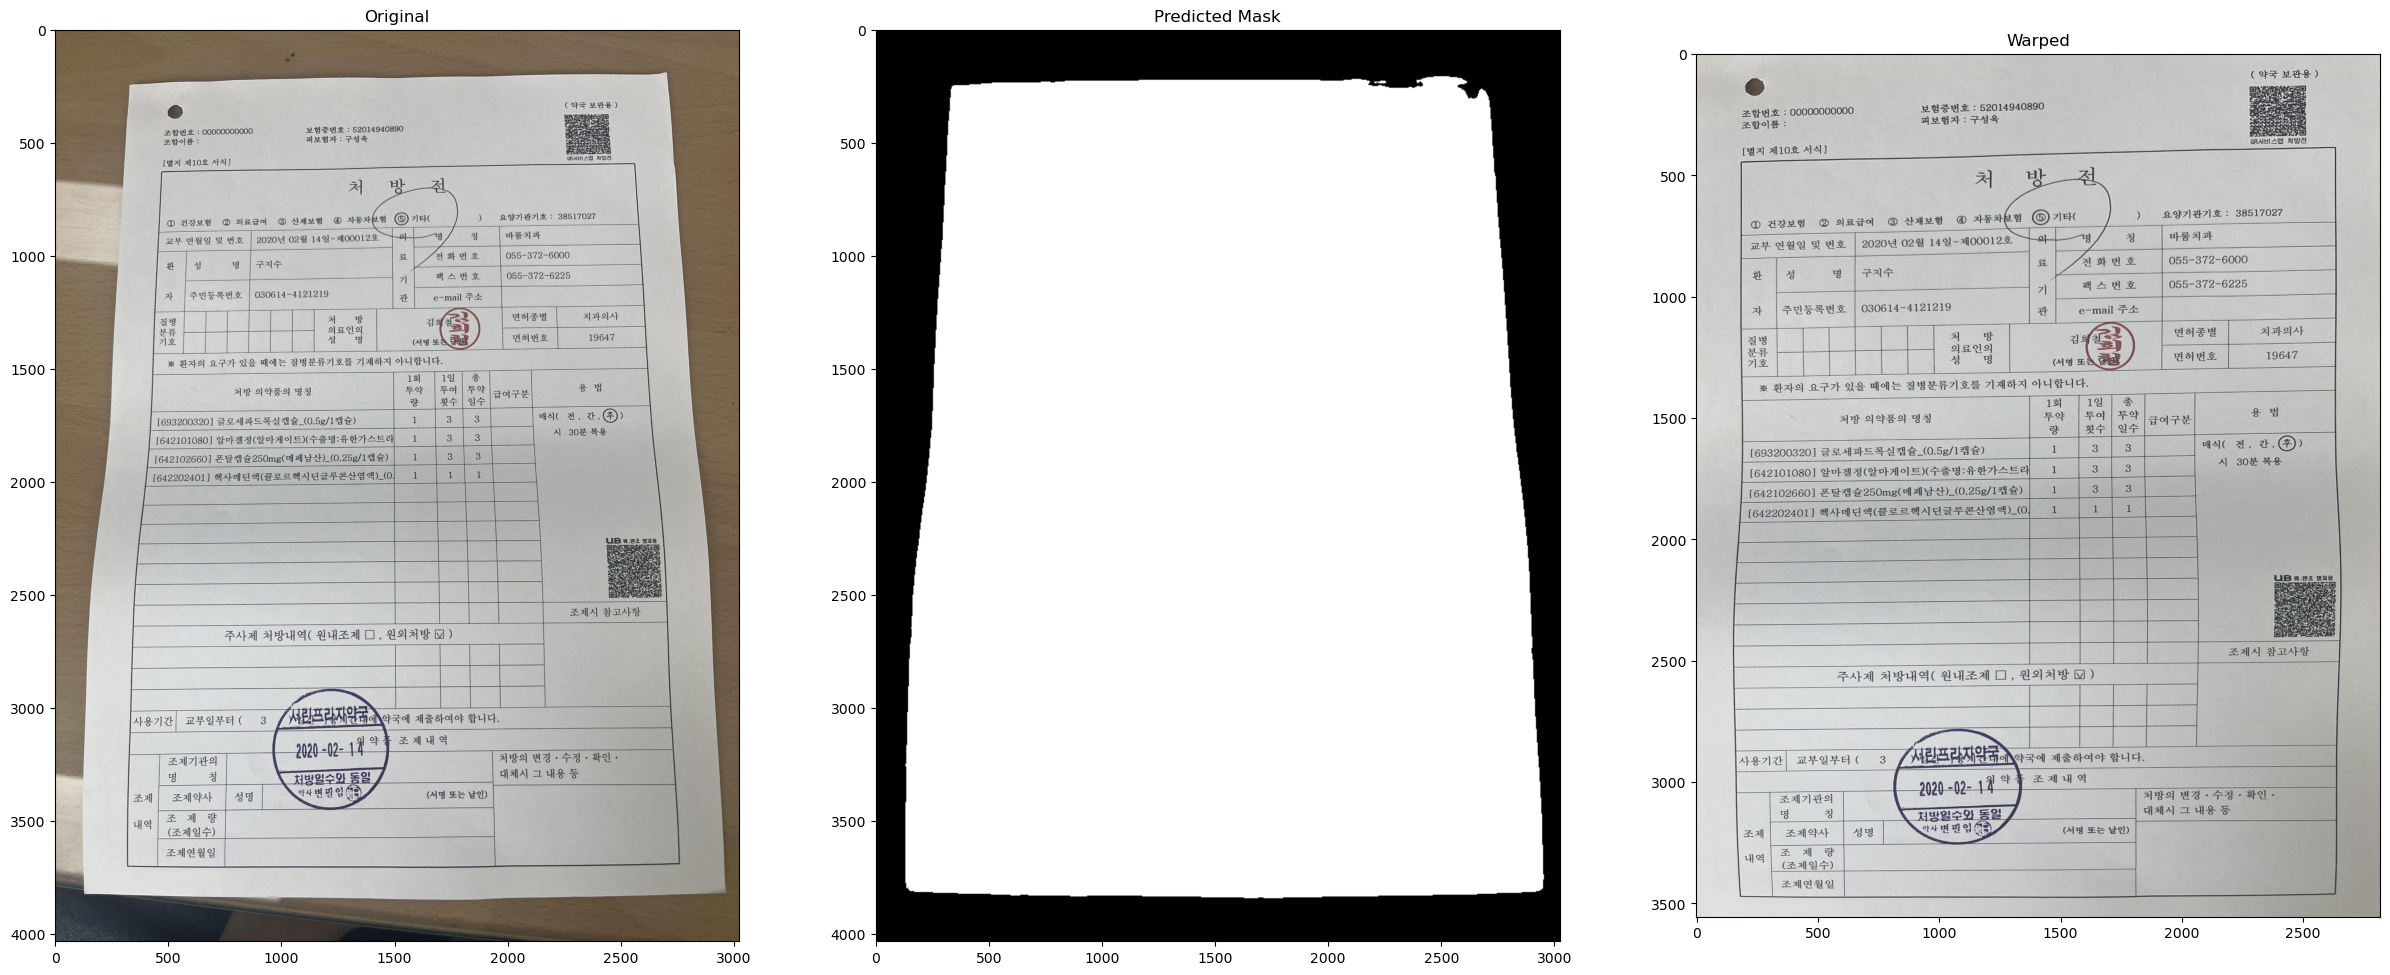

In [448]:
f, axarr = plt.subplots(1,3, figsize=(30,21))

i = -6
#cur_scan = scan_images[i]


axarr[0].imshow(im_original)
axarr[0].title.set_text('Original')

axarr[1].imshow(mask_to_find, cmap='gray')
axarr[1].title.set_text('Predicted Mask')

axarr[2].imshow(warped)
axarr[2].title.set_text('Warped')

# Make all masks

In [351]:
test_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_camera_good"
crop_images_save_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_crop_good"
#orig_folder = "final_camera"


from models.u2net import U2NETP, U2NET
segment = U2NETP(out_ch=1).to(device)

segmentation_model_path = './weights/mask_0402_fin.pth'
segment.load_state_dict(torch.load(segmentation_model_path))

loader = transforms.Compose([transforms.ToTensor()])

In [352]:
num_pixels_x, num_pixels_y, num_channels = 1024, 768, 3

In [353]:
for test_img_path in sorted(os.listdir(test_images_base_path)):

    im = Image.open(f"{test_images_base_path}/{test_img_path}")
    im = ImageOps.exif_transpose(im)
    im_original = copy.deepcopy(im)
    im_original = np.array(im_original)
    im = im.resize((num_pixels_y, num_pixels_x))
    im = np.array(im)

    
    image = loader(im).float()
    image = image.unsqueeze(0).to(device)
    

    with torch.no_grad():
        mask = segment(image)

    mask_det = torch.permute(mask[0].detach().cpu(), (0, 2,3, 1)).numpy()
    mask_det = mask_det>0.8

    mask_to_find = mask_det[0]
    mask_to_find = np.array(mask_to_find*255).astype(np.uint8)
    mask_to_find = Image.fromarray(mask_to_find[:,:,0])

    x,y,_ = im_original.shape
    mask_to_find = mask_to_find.resize((y, x))
    mask_to_find = np.array(mask_to_find)
    
    contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    simplified_contours = []

    try:
        for cnt in contours:
            hull = cv2.convexHull(cnt)
            simplified_contours.append(cv2.approxPolyDP(hull,
                                                        0.001 * cv2.arcLength(hull, True), True))
        biggest_n, approx_contour = biggest_contour(simplified_contours, 1000)

        warped = four_point_transform(im_original, approx_contour)
        
#         f, axarr = plt.subplots(1,3, figsize=(30,21))

#         axarr[0].imshow(im)
#         axarr[0].title.set_text('Original')

#         axarr[1].imshow(mask_det[0], cmap='gray')
#         axarr[1].title.set_text('Predicted Mask')

#         axarr[2].imshow(warped)
#         axarr[2].title.set_text('Warped')
#         plt.show()

        PIL_image = Image.fromarray(warped.astype('uint8'), 'RGB')
        PIL_image.save(f"{crop_images_save_path}/{test_img_path}")
    except Exception as e:
        print(f"error: {e} -- file: {test_img_path}")

    #break

[[[  92    2]]

 [[1036    9]]

 [[1043 1402]]

 [[  40 1396]]]
---------
[[  92.    2.]
 [1036.    9.]
 [1043. 1402.]
 [  40. 1396.]]
[[[1063    1]]

 [[1074 1439]]

 [[   0 1439]]

 [[   0    0]]]
---------
[[0.000e+00 0.000e+00]
 [1.063e+03 1.000e+00]
 [1.074e+03 1.439e+03]
 [0.000e+00 1.439e+03]]
[[[ 278  132]]

 [[2828  167]]

 [[2914 3840]]

 [[ 215 3844]]]
---------
[[ 278.  132.]
 [2828.  167.]
 [2914. 3840.]
 [ 215. 3844.]]
[[[ 282  136]]

 [[2816  171]]

 [[2922 3864]]

 [[ 175 3867]]]
---------
[[ 282.  136.]
 [2816.  171.]
 [2922. 3864.]
 [ 175. 3867.]]
[[[2666  167]]

 [[2749 3647]]

 [[ 219 3675]]

 [[ 238  187]]]
---------
[[ 238.  187.]
 [2666.  167.]
 [2749. 3647.]
 [ 219. 3675.]]
[[[ 984   25]]

 [[1047 1361]]

 [[  58 1326]]

 [[ 124   55]]]
---------
[[ 124.   55.]
 [ 984.   25.]
 [1047. 1361.]
 [  58. 1326.]]
[[[2883    2]]

 [[2926 4017]]

 [[  50 3942]]

 [[ 124   18]]]
---------
[[1.240e+02 1.800e+01]
 [2.883e+03 2.000e+00]
 [2.926e+03 4.017e+03]
 [5.000e+01 3.9

[[[2678  183]]

 [[2887 3990]]

 [[   0 4031]]

 [[ 112  195]]]
---------
[[ 112.  195.]
 [2678.  183.]
 [2887. 3990.]
 [   0. 4031.]]
[[[ 278  104]]

 [[2812  124]]

 [[2922 3875]]

 [[ 136 3812]]]
---------
[[ 278.  104.]
 [2812.  124.]
 [2922. 3875.]
 [ 136. 3812.]]
[[[2658  289]]

 [[2919 3792]]

 [[ 140 3864]]

 [[ 301  313]]]
---------
[[ 301.  313.]
 [2658.  289.]
 [2919. 3792.]
 [ 140. 3864.]]
[[[2812   93]]

 [[2919 3934]]

 [[ 168 3879]]

 [[ 171   93]]]
---------
[[ 171.   93.]
 [2812.   93.]
 [2919. 3934.]
 [ 168. 3879.]]
[[[ 486   77]]

 [[2420   80]]

 [[2622 2990]]

 [[ 341 2963]]]
---------
[[ 486.   77.]
 [2420.   80.]
 [2622. 2990.]
 [ 341. 2963.]]
[[[ 959    1]]

 [[1048 1385]]

 [[   1 1346]]

 [[  79   36]]]
---------
[[7.900e+01 3.600e+01]
 [9.590e+02 1.000e+00]
 [1.048e+03 1.385e+03]
 [1.000e+00 1.346e+03]]
[[[ 959    1]]

 [[1048 1385]]

 [[   1 1346]]

 [[  79   36]]]
---------
[[7.900e+01 3.600e+01]
 [9.590e+02 1.000e+00]
 [1.048e+03 1.385e+03]
 [1.000e+00 1.3

[[[ 219  108]]

 [[2793  140]]

 [[2906 3875]]

 [[ 148 3852]]]
---------
[[ 219.  108.]
 [2793.  140.]
 [2906. 3875.]
 [ 148. 3852.]]
[[[ 294  104]]

 [[2773  171]]

 [[2911 3895]]

 [[  26 3844]]]
---------
[[ 294.  104.]
 [2773.  171.]
 [2911. 3895.]
 [  26. 3844.]]
[[[2471    7]]

 [[2763 2981]]

 [[ 224 2984]]

 [[ 477    2]]]
---------
[[4.770e+02 2.000e+00]
 [2.471e+03 7.000e+00]
 [2.763e+03 2.981e+03]
 [2.240e+02 2.984e+03]]
[[[ 231  108]]

 [[2686  148]]

 [[2898 3832]]

 [[   2 3844]]]
---------
[[2.310e+02 1.080e+02]
 [2.686e+03 1.480e+02]
 [2.898e+03 3.832e+03]
 [2.000e+00 3.844e+03]]
[[[2934    2]]

 [[2974 4029]]

 [[   2 4031]]

 [[   0    6]]]
---------
[[0.000e+00 6.000e+00]
 [2.934e+03 2.000e+00]
 [2.974e+03 4.029e+03]
 [2.000e+00 4.031e+03]]
[[[2753  195]]

 [[2934 3942]]

 [[  62 3958]]

 [[ 242  207]]]
---------
[[ 242.  207.]
 [2753.  195.]
 [2934. 3942.]
 [  62. 3958.]]
[[[ 968    9]]

 [[1014 1355]]

 [[  54 1322]]

 [[  81   50]]]
---------
[[  81.   50.]
 [ 96

[[[2749  171]]

 [[2836 3899]]

 [[ 129 3875]]

 [[ 215  203]]]
---------
[[ 215.  203.]
 [2749.  171.]
 [2836. 3899.]
 [ 129. 3875.]]
[[[1035    2]]

 [[1049 1399]]

 [[   2 1399]]

 [[   5    3]]]
---------
[[   5.    3.]
 [1035.    2.]
 [1049. 1399.]
 [   2. 1399.]]
[[[ 220   96]]

 [[2863  136]]

 [[2914 3931]]

 [[ 191 3875]]]
---------
[[ 220.   96.]
 [2863.  136.]
 [2914. 3931.]
 [ 191. 3875.]]
[[[ 227  128]]

 [[2848  144]]

 [[2863 3931]]

 [[ 148 3860]]]
---------
[[ 227.  128.]
 [2848.  144.]
 [2863. 3931.]
 [ 148. 3860.]]
[[[  51    1]]

 [[1004   27]]

 [[1079 1439]]

 [[   2 1438]]]
---------
[[5.100e+01 1.000e+00]
 [1.004e+03 2.700e+01]
 [1.079e+03 1.439e+03]
 [2.000e+00 1.438e+03]]
[[[ 156  128]]

 [[2785  144]]

 [[2891 3958]]

 [[  73 3982]]]
---------
[[ 156.  128.]
 [2785.  144.]
 [2891. 3958.]
 [  73. 3982.]]
[[[ 184   69]]

 [[2871  132]]

 [[2890 3950]]

 [[ 167 3914]]]
---------
[[ 184.   69.]
 [2871.  132.]
 [2890. 3950.]
 [ 167. 3914.]]
[[[2808   53]]

 [[2903

[[[ 278  179]]

 [[2722  246]]

 [[2926 3942]]

 [[   2 3919]]]
---------
[[2.780e+02 1.790e+02]
 [2.722e+03 2.460e+02]
 [2.926e+03 3.942e+03]
 [2.000e+00 3.919e+03]]
[[[ 594  124]]

 [[2463  133]]

 [[2806 2966]]

 [[ 321 2977]]]
---------
[[ 594.  124.]
 [2463.  133.]
 [2806. 2966.]
 [ 321. 2977.]]
[[[ 961    3]]

 [[1048 1375]]

 [[  12 1348]]

 [[  84   36]]]
---------
[[  84.   36.]
 [ 961.    3.]
 [1048. 1375.]
 [  12. 1348.]]
[[[1045    1]]

 [[1078 1423]]

 [[   6 1439]]

 [[  49    1]]]
---------
[[4.900e+01 1.000e+00]
 [1.045e+03 1.000e+00]
 [1.078e+03 1.423e+03]
 [6.000e+00 1.439e+03]]
[[[2843    6]]

 [[2879 3986]]

 [[  65 3915]]

 [[ 100   34]]]
---------
[[ 100.   34.]
 [2843.    6.]
 [2879. 3986.]
 [  65. 3915.]]
[[[  93   93]]

 [[2749  112]]

 [[2898 4029]]

 [[   2 4031]]]
---------
[[9.300e+01 9.300e+01]
 [2.749e+03 1.120e+02]
 [2.898e+03 4.029e+03]
 [2.000e+00 4.031e+03]]


In [291]:
# TODO: use original size for masking process!

In [354]:

def biggest_contour(contours, min_area):
    biggest = None
    max_area = 0
    biggest_n = 0
    approx_contour = None
    for n, i in enumerate(contours):
        area = cv2.contourArea(i)

        if area > min_area / 30:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
                biggest_n = n
                approx_contour = approx

    return biggest_n, approx_contour


def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    pts = pts.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect


# ## Find the exact (x,y) coordinates of the biggest contour and crop it out


def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    print(pts)
    rect = order_points(pts)
    print("---------")
    print(rect)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

In [258]:
#blur = transforms.GaussianBlur(3, sigma=(0.8, 1.2))
jitt = transforms.ColorJitter(brightness=(0.5, 1.5), contrast=0.1, saturation=0.1, hue=0.1)
im_crop = Image.open(f"{crop_images_save_path}/{im_path}").convert('RGB')
im_crop = ImageOps.exif_transpose(im_crop)
im_crop = im_crop.resize((num_pixels_y, num_pixels_x))

blurred_image = jitt(im_crop)

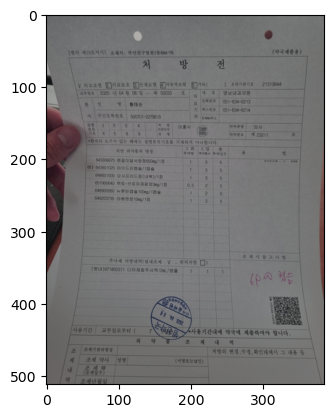

In [259]:
plt.imshow(blurred_image)

In [ ]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]


# Make numpy arrays

In [358]:
crop_images_save_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_crop_good"
scan_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/final_scan_good"

In [365]:
# num_pixels_x, num_pixels_y, num_channels = 1600//1, 1200//1, 3
num_pixels_x, num_pixels_y, num_channels = 2048//4, 1536//4, 3

crop_images = np.zeros((len(os.listdir(crop_images_save_path)), num_pixels_x, num_pixels_y, num_channels), dtype=np.uint8)
scan_images = np.zeros((len(os.listdir(crop_images_save_path)), num_pixels_x, num_pixels_y, num_channels), dtype=np.uint8)

In [366]:
from tqdm import tqdm
for count, im_path in enumerate(tqdm(sorted(os.listdir(crop_images_save_path)))):

    im_crop = Image.open(f"{crop_images_save_path}/{im_path}").convert('RGB')
    im_scan = Image.open(f"{scan_images_base_path}/{im_path}").convert('RGB')
    
    im_crop = ImageOps.exif_transpose(im_crop)
    im_scan = ImageOps.exif_transpose(im_scan)
    
    im_crop = im_crop.resize((num_pixels_y, num_pixels_x))
    im_scan = im_scan.resize((num_pixels_y, num_pixels_x))
    
    im_crop = np.array(im_crop)
    im_scan = np.array(im_scan)

    crop_images[count] = im_crop
    scan_images[count] = im_scan
    #print(i)

100%|████████████████████████████████████████████████████████████████████████████████| 237/237 [00:30<00:00,  7.74it/s]


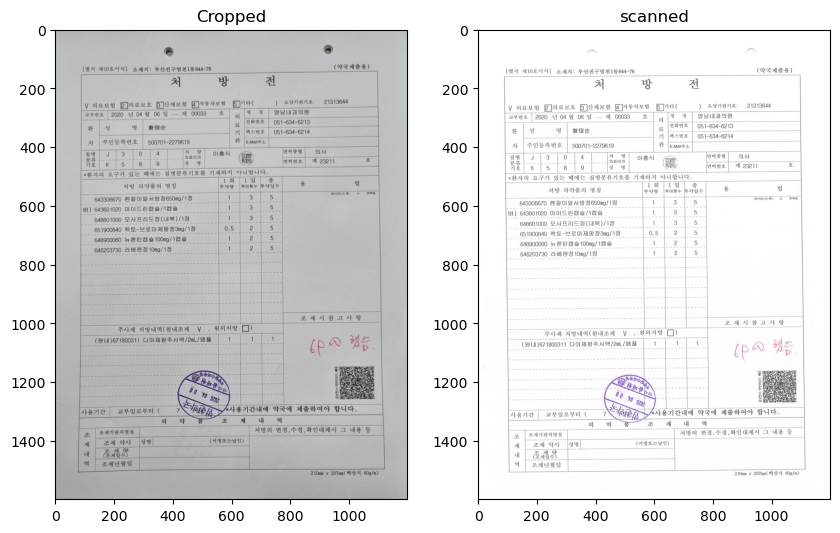

In [318]:
f, axarr = plt.subplots(1,2, figsize=(10,7))

i = -1


cur_orig = crop_images[i]
cur_mask = scan_images[i]


axarr[0].imshow(cur_orig)
axarr[0].title.set_text('Cropped')

axarr[1].imshow(cur_mask, cmap='gray')
axarr[1].title.set_text('scanned')

In [367]:
base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination"

pixel_size = num_pixels_x

    
with open(f"{base_path}/crop_{pixel_size}_good.npy", 'wb') as f:
    np.save(f, crop_images)
    
with open(f"{base_path}/scan_{pixel_size}_good.npy", 'wb') as f:
    np.save(f, scan_images)
    
    

    
# with open(f"{base_path}/orig_{pixel_size}.npy", 'rb') as f:
#     orig_images = np.load(f)
    
# with open(f"{base_path}/mask_{pixel_size}.npy", 'rb') as f:
#     mask_images = np.load(f)

In [59]:
len(sorted(os.listdir(crop_images_save_path)))

['양나윤.jpg',
 '양나윤_2.jpg',
 '양문심a.jpg',
 '양문심a_2.jpg',
 '양문심b.jpg',
 '양문심b_2.jpg',
 '어쌍이.jpg',
 '어쌍이_2.jpg',
 '엄성은.jpg',
 '엄성은_2.jpg',
 '염철우.jpg',
 '염철우_2.jpg',
 '예종춘.jpg',
 '예종춘_2.jpg',
 '오경자.jpg',
 '오경자_2.jpg',
 '오기운.jpg',
 '오기운_2.jpg',
 '오성빈.jpg',
 '오성빈_2.jpg',
 '오영자a.jpg',
 '오영자a_2.jpg',
 '오영자b.jpg',
 '오영자b_2.jpg',
 '오종희.jpg',
 '오종희_2.jpg',
 '오진정.jpg',
 '오혜숙.jpg',
 '오혜숙_2.jpg',
 '옥정환.jpg',
 '옥정환_2.jpg',
 '우메이시.jpg',
 '우메이시_2.jpg',
 '우영구.jpg',
 '우영구_2.jpg',
 '우태복.jpg',
 '우태복_2.jpg',
 '우필난.jpg',
 '우필난_2.jpg',
 '원희성.jpg',
 '원희성_2.jpg',
 '유금자.jpg',
 '유금자_2.jpg',
 '유돌수.jpg',
 '유돌수_2.jpg',
 '유신애.jpg',
 '유신애_2.jpg',
 '유영식.jpg',
 '유춘희.jpg',
 '유춘희_2.jpg',
 '윤강순.jpg',
 '윤강순_2.jpg',
 '윤경태.jpg',
 '윤경태_2.jpg',
 '윤길자.jpg',
 '윤두엽.jpg',
 '윤두엽_2.jpg',
 '윤말연.jpg',
 '윤말연_2.jpg',
 '윤말임.jpg',
 '윤묘자.jpg',
 '윤부자.jpg',
 '윤부자_2.jpg',
 '윤분남.jpg',
 '윤승만b.jpg',
 '윤신채.jpg',
 '윤신채_2.jpg',
 '윤정숙.jpg',
 '윤정숙_2.jpg',
 '윤희팔.jpg',
 '윤희팔_2.jpg',
 '이강원.jpg',
 '이건매.jpg',
 '이건매_2.jpg',
 '이귀순.jpg',
 '이균일.jpg',
 '이균일_2.jpg

In [61]:
from tqdm import tqdm

i = 0
flag = 0
for count, im_path in enumerate(sorted(os.listdir(crop_images_save_path))[i*100:(i+1)*100]):

#     if flag == 0:
#         if '김옥자' in im_path:
#             flag = 1
#         continue
        
    print(im_path)
    im_crop = Image.open(f"{crop_images_save_path}/{im_path}").convert('RGB')
    im_scan = Image.open(f"{scan_images_base_path}/{im_path}").convert('RGB')
    
    im_crop = ImageOps.exif_transpose(im_crop)
    im_scan = ImageOps.exif_transpose(im_scan)
    
    im_crop = im_crop.resize((num_pixels_y, num_pixels_x))
    im_scan = im_scan.resize((num_pixels_y, num_pixels_x))

    f, axarr = plt.subplots(1,2, figsize=(10,7))
    axarr[0].imshow(im_crop)
    axarr[0].title.set_text('Cropped')

    axarr[1].imshow(im_scan, cmap='gray')
    axarr[1].title.set_text('scanned')
    plt.show()
#     im_crop = np.array(im_crop)
#     im_scan = np.array(im_scan)

#     crop_images[count] = im_crop
#     scan_images[count] = im_scan
    #print(i)

In [ ]:
강순연 -- gray
김영희 -- incorrect  (only 3 is correct)
김정남
김정순
박순연
신정이
이동진a
장일순_2

한탁수 -- not good scan

# Qunaitize and make script

In [388]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class REBNCONV(nn.Module):
    def __init__(self,in_ch=3,out_ch=3,dirate=1):
        super(REBNCONV,self).__init__()

        self.conv_s1 = nn.Conv2d(in_ch,out_ch,3,padding=1*dirate,dilation=1*dirate)
        self.bn_s1 = nn.BatchNorm2d(out_ch)
        self.relu_s1 = nn.ReLU(inplace=True)

    def forward(self,x):

        hx = x
        xout = self.relu_s1(self.bn_s1(self.conv_s1(hx)))

        return xout

## upsample tensor 'src' to have the same spatial size with tensor 'tar'
def _upsample_like(src,tar):

    src = nn.functional.interpolate(src,size=tar.shape[2:],mode='bilinear')

    return src


### RSU-7 ###
class RSU7(nn.Module):#UNet07DRES(nn.Module):

    def __init__(self, in_ch=3, mid_ch=12, out_ch=3):
        super(RSU7,self).__init__()

        self.rebnconvin = REBNCONV(in_ch,out_ch,dirate=1)

        self.rebnconv1 = REBNCONV(out_ch,mid_ch,dirate=1)
        self.pool1 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv2 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool2 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv3 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool3 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv4 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool4 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv5 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool5 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv6 = REBNCONV(mid_ch,mid_ch,dirate=1)

        self.rebnconv7 = REBNCONV(mid_ch,mid_ch,dirate=2)

        self.rebnconv6d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv5d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv4d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv3d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv2d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv1d = REBNCONV(mid_ch*2,out_ch,dirate=1)

        self.skip_add_relu = nn.quantized.FloatFunctional()

    def forward(self,x):

        hx = x
        hxin = self.rebnconvin(hx)

        hx1 = self.rebnconv1(hxin)
        hx = self.pool1(hx1)

        hx2 = self.rebnconv2(hx)
        hx = self.pool2(hx2)

        hx3 = self.rebnconv3(hx)
        hx = self.pool3(hx3)

        hx4 = self.rebnconv4(hx)
        hx = self.pool4(hx4)

        hx5 = self.rebnconv5(hx)
        hx = self.pool5(hx5)

        hx6 = self.rebnconv6(hx)

        hx7 = self.rebnconv7(hx6)

        hx6d =  self.rebnconv6d(torch.cat((hx7,hx6),1))
        hx6dup = _upsample_like(hx6d,hx5)

        hx5d =  self.rebnconv5d(torch.cat((hx6dup,hx5),1))
        hx5dup = _upsample_like(hx5d,hx4)

        hx4d = self.rebnconv4d(torch.cat((hx5dup,hx4),1))
        hx4dup = _upsample_like(hx4d,hx3)

        hx3d = self.rebnconv3d(torch.cat((hx4dup,hx3),1))
        hx3dup = _upsample_like(hx3d,hx2)

        hx2d = self.rebnconv2d(torch.cat((hx3dup,hx2),1))
        hx2dup = _upsample_like(hx2d,hx1)

        hx1d = self.rebnconv1d(torch.cat((hx2dup,hx1),1))

        return self.skip_add_relu.add(hx1d, hxin)

### RSU-6 ###
class RSU6(nn.Module):#UNet06DRES(nn.Module):

    def __init__(self, in_ch=3, mid_ch=12, out_ch=3):
        super(RSU6,self).__init__()

        self.rebnconvin = REBNCONV(in_ch,out_ch,dirate=1)

        self.rebnconv1 = REBNCONV(out_ch,mid_ch,dirate=1)
        self.pool1 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv2 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool2 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv3 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool3 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv4 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool4 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv5 = REBNCONV(mid_ch,mid_ch,dirate=1)

        self.rebnconv6 = REBNCONV(mid_ch,mid_ch,dirate=2)

        self.rebnconv5d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv4d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv3d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv2d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv1d = REBNCONV(mid_ch*2,out_ch,dirate=1)

        self.skip_add_relu = nn.quantized.FloatFunctional()

        
    def forward(self,x):

        hx = x

        hxin = self.rebnconvin(hx)

        hx1 = self.rebnconv1(hxin)
        hx = self.pool1(hx1)

        hx2 = self.rebnconv2(hx)
        hx = self.pool2(hx2)

        hx3 = self.rebnconv3(hx)
        hx = self.pool3(hx3)

        hx4 = self.rebnconv4(hx)
        hx = self.pool4(hx4)

        hx5 = self.rebnconv5(hx)

        hx6 = self.rebnconv6(hx5)


        hx5d =  self.rebnconv5d(torch.cat((hx6,hx5),1))
        hx5dup = _upsample_like(hx5d,hx4)

        hx4d = self.rebnconv4d(torch.cat((hx5dup,hx4),1))
        hx4dup = _upsample_like(hx4d,hx3)

        hx3d = self.rebnconv3d(torch.cat((hx4dup,hx3),1))
        hx3dup = _upsample_like(hx3d,hx2)

        hx2d = self.rebnconv2d(torch.cat((hx3dup,hx2),1))
        hx2dup = _upsample_like(hx2d,hx1)

        hx1d = self.rebnconv1d(torch.cat((hx2dup,hx1),1))

        return self.skip_add_relu.add(hx1d, hxin)

### RSU-5 ###
class RSU5(nn.Module):#UNet05DRES(nn.Module):

    def __init__(self, in_ch=3, mid_ch=12, out_ch=3):
        super(RSU5,self).__init__()

        self.rebnconvin = REBNCONV(in_ch,out_ch,dirate=1)

        self.rebnconv1 = REBNCONV(out_ch,mid_ch,dirate=1)
        self.pool1 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv2 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool2 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv3 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool3 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv4 = REBNCONV(mid_ch,mid_ch,dirate=1)

        self.rebnconv5 = REBNCONV(mid_ch,mid_ch,dirate=2)

        self.rebnconv4d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv3d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv2d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv1d = REBNCONV(mid_ch*2,out_ch,dirate=1)
        
        self.skip_add_relu = nn.quantized.FloatFunctional()

    def forward(self,x):

        hx = x

        hxin = self.rebnconvin(hx)

        hx1 = self.rebnconv1(hxin)
        hx = self.pool1(hx1)

        hx2 = self.rebnconv2(hx)
        hx = self.pool2(hx2)

        hx3 = self.rebnconv3(hx)
        hx = self.pool3(hx3)

        hx4 = self.rebnconv4(hx)

        hx5 = self.rebnconv5(hx4)

        hx4d = self.rebnconv4d(torch.cat((hx5,hx4),1))
        hx4dup = _upsample_like(hx4d,hx3)

        hx3d = self.rebnconv3d(torch.cat((hx4dup,hx3),1))
        hx3dup = _upsample_like(hx3d,hx2)

        hx2d = self.rebnconv2d(torch.cat((hx3dup,hx2),1))
        hx2dup = _upsample_like(hx2d,hx1)

        hx1d = self.rebnconv1d(torch.cat((hx2dup,hx1),1))

        return self.skip_add_relu.add(hx1d, hxin)

### RSU-4 ###
class RSU4(nn.Module):#UNet04DRES(nn.Module):

    def __init__(self, in_ch=3, mid_ch=12, out_ch=3):
        super(RSU4,self).__init__()

        self.rebnconvin = REBNCONV(in_ch,out_ch,dirate=1)

        self.rebnconv1 = REBNCONV(out_ch,mid_ch,dirate=1)
        self.pool1 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv2 = REBNCONV(mid_ch,mid_ch,dirate=1)
        self.pool2 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.rebnconv3 = REBNCONV(mid_ch,mid_ch,dirate=1)

        self.rebnconv4 = REBNCONV(mid_ch,mid_ch,dirate=2)

        self.rebnconv3d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv2d = REBNCONV(mid_ch*2,mid_ch,dirate=1)
        self.rebnconv1d = REBNCONV(mid_ch*2,out_ch,dirate=1)
        
        self.skip_add_relu = nn.quantized.FloatFunctional()

    def forward(self,x):

        hx = x

        hxin = self.rebnconvin(hx)

        hx1 = self.rebnconv1(hxin)
        hx = self.pool1(hx1)

        hx2 = self.rebnconv2(hx)
        hx = self.pool2(hx2)

        hx3 = self.rebnconv3(hx)

        hx4 = self.rebnconv4(hx3)

        hx3d = self.rebnconv3d(torch.cat((hx4,hx3),1))
        hx3dup = _upsample_like(hx3d,hx2)

        hx2d = self.rebnconv2d(torch.cat((hx3dup,hx2),1))
        hx2dup = _upsample_like(hx2d,hx1)

        hx1d = self.rebnconv1d(torch.cat((hx2dup,hx1),1))

        return self.skip_add_relu.add(hx1d, hxin)

### RSU-4F ###
class RSU4F(nn.Module):#UNet04FRES(nn.Module):

    def __init__(self, in_ch=3, mid_ch=12, out_ch=3):
        super(RSU4F,self).__init__()

        self.rebnconvin = REBNCONV(in_ch,out_ch,dirate=1)

        self.rebnconv1 = REBNCONV(out_ch,mid_ch,dirate=1)
        self.rebnconv2 = REBNCONV(mid_ch,mid_ch,dirate=2)
        self.rebnconv3 = REBNCONV(mid_ch,mid_ch,dirate=4)

        self.rebnconv4 = REBNCONV(mid_ch,mid_ch,dirate=8)

        self.rebnconv3d = REBNCONV(mid_ch*2,mid_ch,dirate=4)
        self.rebnconv2d = REBNCONV(mid_ch*2,mid_ch,dirate=2)
        self.rebnconv1d = REBNCONV(mid_ch*2,out_ch,dirate=1)
        
        self.skip_add_relu = nn.quantized.FloatFunctional()

    def forward(self,x):

        hx = x

        hxin = self.rebnconvin(hx)

        hx1 = self.rebnconv1(hxin)
        hx2 = self.rebnconv2(hx1)
        hx3 = self.rebnconv3(hx2)

        hx4 = self.rebnconv4(hx3)

        hx3d = self.rebnconv3d(torch.cat((hx4,hx3),1))
        hx2d = self.rebnconv2d(torch.cat((hx3d,hx2),1))
        hx1d = self.rebnconv1d(torch.cat((hx2d,hx1),1))

        return self.skip_add_relu.add(hx1d, hxin)

### U^2-Net small ###
class U2NETP(nn.Module):

    def __init__(self,in_ch=3,out_ch=3):
        super(U2NETP,self).__init__()

        self.stage1 = RSU7(in_ch,16,64)
        self.pool12 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.stage2 = RSU6(64,16,64)
        self.pool23 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.stage3 = RSU5(64,16,64)
        self.pool34 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.stage4 = RSU4(64,16,64)
        self.pool45 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.stage5 = RSU4F(64,16,64)
        self.pool56 = nn.MaxPool2d(2,stride=2,ceil_mode=True)

        self.stage6 = RSU4F(64,16,64)

        # decoder
        self.stage5d = RSU4F(128,16,64)
        self.stage4d = RSU4(128,16,64)
        self.stage3d = RSU5(128,16,64)
        self.stage2d = RSU6(128,16,64)
        self.stage1d = RSU7(128,16,64)

        self.side1 = nn.Conv2d(64,out_ch,3,padding=1)
        self.side2 = nn.Conv2d(64,out_ch,3,padding=1)
        self.side3 = nn.Conv2d(64,out_ch,3,padding=1)
        self.side4 = nn.Conv2d(64,out_ch,3,padding=1)
        self.side5 = nn.Conv2d(64,out_ch,3,padding=1)
        self.side6 = nn.Conv2d(64,out_ch,3,padding=1)

        self.outconv = nn.Conv2d(6*out_ch,out_ch,1)
        
        #self.tan = nn.Tanh()

    def forward(self,x):

        hx = x

        #stage 1
        hx1 = self.stage1(hx)
        hx = self.pool12(hx1)

        #stage 2
        hx2 = self.stage2(hx)
        hx = self.pool23(hx2)

        #stage 3
        hx3 = self.stage3(hx)
        hx = self.pool34(hx3)

        #stage 4
        hx4 = self.stage4(hx)
        hx = self.pool45(hx4)

        #stage 5
        hx5 = self.stage5(hx)
        hx = self.pool56(hx5)

        #stage 6
        hx6 = self.stage6(hx)
        hx6up = _upsample_like(hx6,hx5)

        #decoder
        hx5d = self.stage5d(torch.cat((hx6up,hx5),1))
        hx5dup = _upsample_like(hx5d,hx4)

        hx4d = self.stage4d(torch.cat((hx5dup,hx4),1))
        hx4dup = _upsample_like(hx4d,hx3)

        hx3d = self.stage3d(torch.cat((hx4dup,hx3),1))
        hx3dup = _upsample_like(hx3d,hx2)

        hx2d = self.stage2d(torch.cat((hx3dup,hx2),1))
        hx2dup = _upsample_like(hx2d,hx1)

        hx1d = self.stage1d(torch.cat((hx2dup,hx1),1))


        #side output
        d1 = self.side1(hx1d)

        d2 = self.side2(hx2d)
        d2 = _upsample_like(d2,d1)

        d3 = self.side3(hx3d)
        d3 = _upsample_like(d3,d1)

        d4 = self.side4(hx4d)
        d4 = _upsample_like(d4,d1)

        d5 = self.side5(hx5d)
        d5 = _upsample_like(d5,d1)

        d6 = self.side6(hx6)
        d6 = _upsample_like(d6,d1)

        d0 = self.outconv(torch.cat((d1,d2,d3,d4,d5,d6),1))
        
        d0 = torch.sigmoid(d0)
        
        d0 = torch.permute(d0, (0, 2,3, 1))
        d0 = d0>0.95

        return d0

In [389]:
#from models.u2net import U2NETP, U2NET, REBNCONV
from models.u2net import REBNCONV

segment = U2NETP(out_ch=1).to(device)

segmentation_model_path = './weights/mask_0402_fin.pth'
segment.load_state_dict(torch.load(segmentation_model_path))


norm_mean = [ 0.485, 0.456, 0.406 ]
norm_std  = [ 0.229, 0.224, 0.225 ]

loader = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize(mean = norm_mean, std = norm_std),
])

In [390]:
segment_cpu = copy.deepcopy(segment.to('cpu'))
segment_cpu.eval()
#segment_cpu.fuse_model()

U2NETP(
  (stage1): RSU7(
    (rebnconvin): REBNCONV(
      (conv_s1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (rebnconv1): REBNCONV(
      (conv_s1): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv2): REBNCONV(
      (conv_s1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv3): REBNCONV(
      (conv_s1): Conv2d(16, 16, 

In [391]:
class QuantizedModel(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model_fp32 = model
        self.quant = torch.quantization.QuantStub()
        self.dequant = torch.quantization.DeQuantStub()
        
    def forward(self, x):
        x = self.quant(x)
        x = self.model_fp32(x)
        x = self.dequant(x)
        return x
    
segment_cpu = QuantizedModel(segment_cpu)


In [392]:
for m in segment_cpu.modules():
    #print(type(m))
    if type(m) == REBNCONV:
        print("yes")
        torch.ao.quantization.fuse_modules(m, ['conv_s1', 'bn_s1', 'relu_s1'], inplace=True)

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [393]:
# segment_cpu.qconfig = torch.ao.quantization.default_qconfig
segment_cpu.qconfig = torch.quantization.get_default_qconfig('x86')
torch.quantization.prepare(segment_cpu, inplace=True)
torch.ao.quantization.convert(segment_cpu, inplace=True)

QuantizedModel(
  (model_fp32): U2NETP(
    (stage1): RSU7(
      (rebnconvin): REBNCONV(
        (conv_s1): QuantizedConvReLU2d(3, 64, kernel_size=(3, 3), stride=(1, 1), scale=1.0, zero_point=0, padding=(1, 1))
        (bn_s1): Identity()
        (relu_s1): Identity()
      )
      (rebnconv1): REBNCONV(
        (conv_s1): QuantizedConvReLU2d(64, 16, kernel_size=(3, 3), stride=(1, 1), scale=1.0, zero_point=0, padding=(1, 1))
        (bn_s1): Identity()
        (relu_s1): Identity()
      )
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (rebnconv2): REBNCONV(
        (conv_s1): QuantizedConvReLU2d(16, 16, kernel_size=(3, 3), stride=(1, 1), scale=1.0, zero_point=0, padding=(1, 1))
        (bn_s1): Identity()
        (relu_s1): Identity()
      )
      (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (rebnconv3): REBNCONV(
        (conv_s1): QuantizedConvReLU2d(16, 16, kernel_size=(3, 3), stride=(1, 1

In [394]:
def print_size_of_model(model):
    torch.save(model.state_dict(), "temp.p")
    print('Size (MB):', os.path.getsize("temp.p")/1e6)
    os.remove('temp.p')

In [395]:
print("Size of model before quantization")
print_size_of_model(segment)

print("Size of model after quantization")
print_size_of_model(segment_cpu)

Size of model before quantization
Size (MB): 4.814085
Size of model after quantization
Size (MB): 1.323289


In [414]:
#num_pixels_y, num_pixels_x = 384, 512
#num_pixels_y, num_pixels_x = 192, 256
num_pixels_y, num_pixels_x = 192*4, 256*4

1.4583945274353027
[[[159  33]]

 [[688  98]]

 [[664 990]]

 [[ 43 951]]]
---------
[[159.  33.]
 [688.  98.]
 [664. 990.]
 [ 43. 951.]]


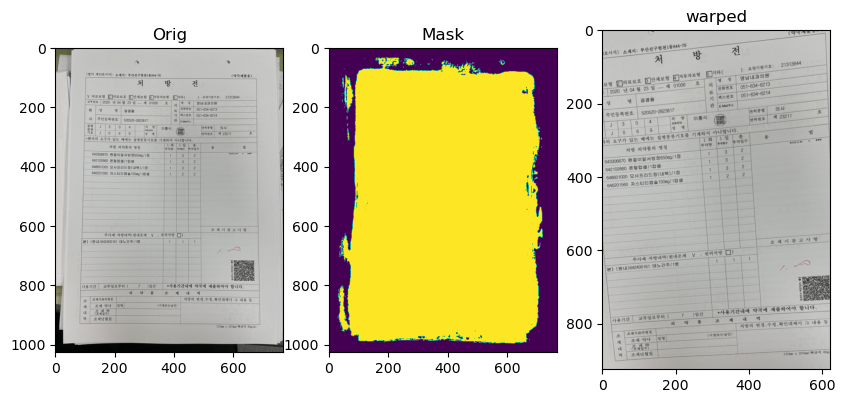

In [415]:

for test_img_path in sorted(os.listdir(test_images_base_path)):

    im = Image.open(f"{test_images_base_path}/{test_img_path}")
    im = ImageOps.exif_transpose(im)
    im = im.resize((num_pixels_y, num_pixels_x))
    im = np.array(im)

    
    image = loader(im)#.float()
    image = image.unsqueeze(0)#.to(device)
    #image = torch.quantize_per_tensor(image, torch.tensor(0.1), torch.tensor(10), torch.quint8)
    #print(image.dtype)
    

    with torch.no_grad():
        start = time.time()
        mask = segment_cpu(image)
        print(f"{time.time() - start}")

    mask_to_find = mask[0]
    mask_to_find = np.array(mask_to_find*255).astype(np.uint8)
    contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    simplified_contours = []

    try:
        for cnt in contours:
            hull = cv2.convexHull(cnt)
            simplified_contours.append(cv2.approxPolyDP(hull,
                                                        0.001 * cv2.arcLength(hull, True), True))
        biggest_n, approx_contour = biggest_contour(simplified_contours, 1000)

        warped = four_point_transform(im, approx_contour)

#         PIL_image = Image.fromarray(warped.astype('uint8'), 'RGB')
#         PIL_image.save(f"{crop_images_save_path}/{test_img_path}")
    except Exception as e:
        print(f"error: {e} -- file: {test_img_path}")

    f, axarr = plt.subplots(1,3, figsize=(10,7))

    axarr[0].imshow(im)
    axarr[0].title.set_text('Orig')

    axarr[1].imshow(mask_to_find)
    axarr[1].title.set_text('Mask')
    
    axarr[2].imshow(warped, cmap='gray')
    axarr[2].title.set_text('warped')
    plt.show()
    break

In [400]:
from torch.utils.mobile_optimizer import optimize_for_mobile

In [408]:
torchscript_model = torch.jit.script(segment_cpu)
torchscript_model_optimized = optimize_for_mobile(torchscript_model)
#torch.jit.save(torchscript_model_optimized, "segmentation_model.ptl")
torchscript_model_optimized._save_for_lite_interpreter("segmentation_model.ptl")

In [412]:
example = torch.rand(1, 3, 256, 192)
traced_script_module = torch.jit.trace(segment_cpu, example)
torchscript_model_optimized = optimize_for_mobile(torchscript_model)
#torch.jit.save(torchscript_model_optimized, "segmentation_model.ptl")
torchscript_model_optimized._save_for_lite_interpreter("segmentation_model.ptl")

In [407]:
# traced_script_module = torch.jit.trace(model, example)
# traced_script_module_optimized = optimize_for_mobile(traced_script_module)
# traced_script_module_optimized._save_for_lite_interpreter("model.ptl")


In [409]:
loaded = torch.jit.load('segmentation_model.ptl')
loaded.eval()

RecursiveScriptModule(original_name=QuantizedModel)

In [410]:
import time

start = time.time()
mask = loaded(image)
print(f"{time.time() - start}")

0.14969253540039062


[[[ 92  62]]

 [[693  75]]

 [[759 941]]

 [[ 48 948]]]
---------
[[ 92.  62.]
 [693.  75.]
 [759. 941.]
 [ 48. 948.]]


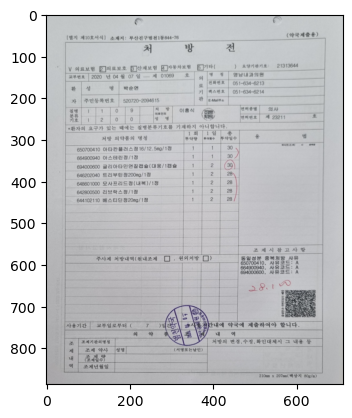

In [30]:
mask_to_find = mask[0]
mask_to_find = np.array(mask_to_find).astype(np.uint8)
contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

simplified_contours = []

for cnt in contours:
    hull = cv2.convexHull(cnt)
    simplified_contours.append(cv2.approxPolyDP(hull,
                                                0.001 * cv2.arcLength(hull, True), True))
biggest_n, approx_contour = biggest_contour(simplified_contours, 1000)

warped = four_point_transform(im, approx_contour)
plt.imshow(warped)

# Create minimal code

In [29]:
import torch
import torchvision.transforms as transforms
import cv2
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

def biggest_contour(contours, min_area):
    biggest = None
    max_area = 0
    biggest_n = 0
    approx_contour = None
    for n, i in enumerate(contours):
        area = cv2.contourArea(i)

        if area > min_area / 30:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
                biggest_n = n
                approx_contour = approx

    return biggest_n, approx_contour


def order_points(pts):
    pts = pts.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")

    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect



def four_point_transform(image, pts):
    print(pts)
    rect = order_points(pts)
    print("---------")
    print(rect)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped




image.shape: torch.Size([1, 3, 1024, 768])
[[[704  32]]

 [[712 984]]

 [[ 51 974]]

 [[ 53  52]]]
---------
[[ 53.  52.]
 [704.  32.]
 [712. 984.]
 [ 51. 974.]]


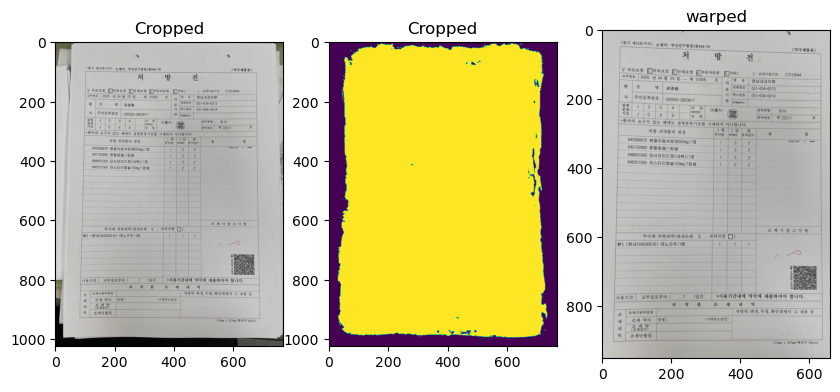

In [41]:
#Initiazliation
num_pixels_x, num_pixels_y, num_channels = 1024, 768, 3
test_images_base_path = "C:/Users/user/OneDrive - 성균관대학교/Desktop/HealthPort/illumination/camera"
test_img_path = "강경용.jpg"

model_path = "segmentation_model.ptl"

loader = transforms.Compose([transforms.ToTensor()])


im = Image.open(f"{test_images_base_path}/{test_img_path}")
im = ImageOps.exif_transpose(im)
im = im.resize((num_pixels_y, num_pixels_x))
im = np.array(im)

image = loader(im)
image = image.unsqueeze(0)   
print(f"image.shape: {image.shape}")

loaded = torch.jit.load(model_path)
loaded.eval()
mask_det = loaded(image)

mask_to_find = mask_det[0]
mask_to_find = mask_to_find>0.2
mask_to_find = np.array(mask_to_find).astype(np.uint8)
contours, hierarchy = cv2.findContours(mask_to_find, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

simplified_contours = []

for cnt in contours:
    hull = cv2.convexHull(cnt)
    simplified_contours.append(cv2.approxPolyDP(hull,
                                                0.001 * cv2.arcLength(hull, True), True))
biggest_n, approx_contour = biggest_contour(simplified_contours, 1000)

warped = four_point_transform(im, approx_contour)

f, axarr = plt.subplots(1,3, figsize=(10,7))

axarr[0].imshow(im)
axarr[0].title.set_text('Cropped')

axarr[1].imshow(mask_to_find)
axarr[1].title.set_text('Cropped')

axarr[2].imshow(warped, cmap='gray')
axarr[2].title.set_text('warped')
plt.show()